# Esercizio KNN


Si dispone di  un dataset in cui alcuni vini sono stati classificati (classe 1, 2 o 3) a seconda delle loro caratteristiche (Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315, Proline).

__Creare un modello K-NN e dire a quale classe appartiene il vino con le seguenti caratteristiche__:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


_(Istruzioni: in ogni casella di codice, scrivere le istruzioni corrispondenti al commento. Si suggerisce di fare una copia di questo file in modo da avere sempre i risultati corretti a disposizione, visto che ad ogni esecuzione gli output vengono ricalcolati)_

In [ ]:
# importiamo Pandas e il dataframe dal file data/wine.csv
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')

In [ ]:
# visualizziamo il dataframe
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",2,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",2,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",2,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",2,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# gender = {'male': 1,'female': 2}
# df.Sex = [gender[item] for item in df.Sex] #sostituiamo le stringhe con il valore del dizionario attribuito

In [ ]:
# emb = {'0': 0,'S': 1,'C': 2,'Q': 3}
# df.Embarked = [emb[item] for item in df.Embarked]

In [ ]:
# visualizziamo il numero di vini per ogni classe
print(df.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


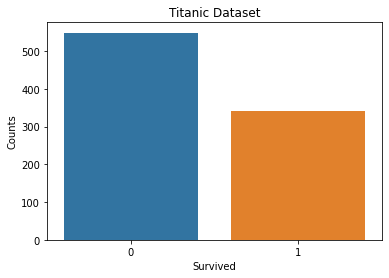

In [ ]:
# per maggior chiarezza, visualizziamo anche il grafico delle classi dei vini
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="Survived", data=df)
plt.title("Titanic Dataset")
plt.xlabel("Survived")
plt.ylabel("Counts")
plt.show()

In [ ]:
# traformiamo il dataframe in una matrice numpy e separiamo il target (la classe, prima colonna, che chiamiamo y)
# dal resto dei dati (le osservazioni, che chiameremo x)

from sklearn import preprocessing

x=df[df.columns.difference(['Survived'])].to_numpy()# prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=df.to_numpy()[:,1].astype(int)  # prendiamo solo l'ultima colonna -> variabile dipendente, target

le = preprocessing.LabelEncoder()
for i in range(x.shape[1]):
  x[:,i] = le.fit_transform(x[:,i])

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({0: 549, 1: 342})

In [ ]:
# vediamo i dati presenti in x e y
import numpy as np
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[28 147 2 18 108 0 0 2 1 1 523]
 [51 81 0 207 190 0 1 0 0 1 596]
 [34 147 2 41 353 0 2 2 0 0 669]
 [47 55 2 189 272 0 3 0 0 1 49]
 [47 147 2 43 15 0 4 2 1 0 472]
 [88 147 1 51 554 0 5 2 1 0 275]
 [69 129 2 186 515 0 6 0 1 0 85]
 [6 147 2 124 624 1 7 2 1 3 395]
 [35 147 2 74 412 2 8 2 0 0 344]
 [18 147 0 154 576 0 9 1 0 1 132]]
y = [0 1 1 1 0 0 0 0 1 1]


In [ ]:
#suddividiamo ora i dati in due dataset, uno per 'allenare' il metodo (training set) 
# e l'altro per testarne l'efficacia (test set). Facciamo in modo che il training set sia il 70% del totale

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
# visualizziamo gli shape dei vari dataset X_train, X_test, y_train e y_test
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((623, 11), (623,), (268, 11), (268,))

In [ ]:
# visualizziamo anche le prime 10 righe dell'X_train e dell'y_train per vedere i dati
# eliminiamo la dotazine scientifica per comodità di lettura
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[28 147 2 18 108 0 0 2 1 1 523]
 [51 81 0 207 190 0 1 0 0 1 596]
 [34 147 2 41 353 0 2 2 0 0 669]
 [47 55 2 189 272 0 3 0 0 1 49]
 [47 147 2 43 15 0 4 2 1 0 472]
 [88 147 1 51 554 0 5 2 1 0 275]
 [69 129 2 186 515 0 6 0 1 0 85]
 [6 147 2 124 624 1 7 2 1 3 395]
 [35 147 2 74 412 2 8 2 0 0 344]
 [18 147 0 154 576 0 9 1 0 1 132]]
y = [0 1 1 1 0 0 0 0 1 1]


In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=15)

In [ ]:
# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

In [ ]:
# e visualizziamo il risultato (solo i primi dieci vini)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 1 0 0 0 0 0 0 1 1]
dati reali presenti nel dataset di test = [0 1 0 0 0 1 1 0 1 1]


In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


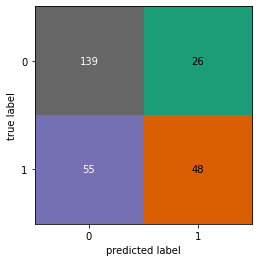

In [ ]:
# valutiamo il nostro metodo:

# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       165
           1       0.65      0.47      0.54       103

    accuracy                           0.70       268
   macro avg       0.68      0.65      0.66       268
weighted avg       0.69      0.70      0.69       268



implementazione di me stesso nel csv

In [ ]:
me = np.array([[999,3,'Davide','male',18.0,0,0,'PC 17599',7.9250,	'C85','C']])

In [ ]:
le = preprocessing.LabelEncoder()
for i in range(me.shape[1]):
  me[:,i] = le.fit_transform(me[:,i])

In [ ]:
# predict = neigh.predict(me)
# predict

# Esercizio dTree


In [ ]:
# importiamo Pandas e il dataframe dal file data/wine.csv
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
gender = {'male': 1,'female': 2}
df.Sex = [gender[item] for item in df.Sex] #sostituiamo le stringhe con il valore del dizionario attribuito

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",2,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",2,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",2,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",2,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S


In [ ]:
df = df.drop(['PassengerId','Survived','Name','Ticket','Fare','Cabin','Embarked'], axis=1)

In [ ]:
df

,Pclass,Sex,Age,SibSp,Parch
1,1,2,38.0,1,0
3,1,2,35.0,1,0
6,1,1,54.0,0,0
10,3,2,4.0,1,1
11,1,2,58.0,0,0
...,...,...,...,...,...
871,1,2,47.0,1,1
872,1,1,33.0,0,0
879,1,2,56.0,0,1
887,1,2,19.0,0,0


In [ ]:
import numpy as np

dfnp = df.to_numpy()
x=df.drop(['PassengerId','Survived','Name','Ticket','Fare','Cabin','Embarked'], axis=1).to_numpy() # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=df.to_numpy()[:,1] # prendiamo solo l'ultima colonna -> variabile dipendente, target
y = y.astype(int)

In [ ]:
x

array([[ 1.  ,  2.  , 38.  ,  1.  ,  0.  ],
       [ 1.  ,  2.  , 35.  ,  1.  ,  0.  ],
       [ 1.  ,  1.  , 54.  ,  0.  ,  0.  ],
       [ 3.  ,  2.  ,  4.  ,  1.  ,  1.  ],
       [ 1.  ,  2.  , 58.  ,  0.  ,  0.  ],
       [ 2.  ,  1.  , 34.  ,  0.  ,  0.  ],
       [ 1.  ,  1.  , 28.  ,  0.  ,  0.  ],
       [ 1.  ,  1.  , 19.  ,  3.  ,  2.  ],
       [ 1.  ,  2.  , 49.  ,  1.  ,  0.  ],
       [ 1.  ,  1.  , 65.  ,  0.  ,  1.  ],
       [ 1.  ,  1.  , 45.  ,  1.  ,  0.  ],
       [ 2.  ,  2.  , 29.  ,  0.  ,  0.  ],
       [ 3.  ,  1.  , 25.  ,  0.  ,  0.  ],
       [ 1.  ,  2.  , 23.  ,  3.  ,  2.  ],
       [ 1.  ,  1.  , 46.  ,  1.  ,  0.  ],
       [ 1.  ,  1.  , 71.  ,  0.  ,  0.  ],
       [ 1.  ,  1.  , 23.  ,  0.  ,  1.  ],
       [ 1.  ,  1.  , 21.  ,  0.  ,  1.  ],
       [ 1.  ,  1.  , 47.  ,  0.  ,  0.  ],
       [ 1.  ,  1.  , 24.  ,  0.  ,  1.  ],
       [ 2.  ,  2.  , 32.5 ,  0.  ,  0.  ],
       [ 1.  ,  1.  , 54.  ,  0.  ,  1.  ],
       [ 1.  ,  2.  , 19.  ,  0.

In [ ]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1])

In [ ]:
# split data into training/test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.33, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((122, 5), (122,), (61, 5), (61,))

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [1 1 1 1 0 1 1 0 0 1]
dati reali presenti nel dataset di test = [1 0 1 0 1 0 1 0 0 1]


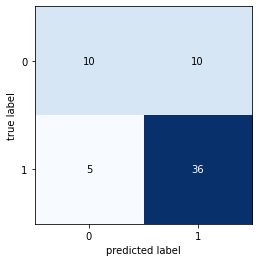

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        20
           1       0.78      0.88      0.83        41

    accuracy                           0.75        61
   macro avg       0.72      0.69      0.70        61
weighted avg       0.74      0.75      0.74        61



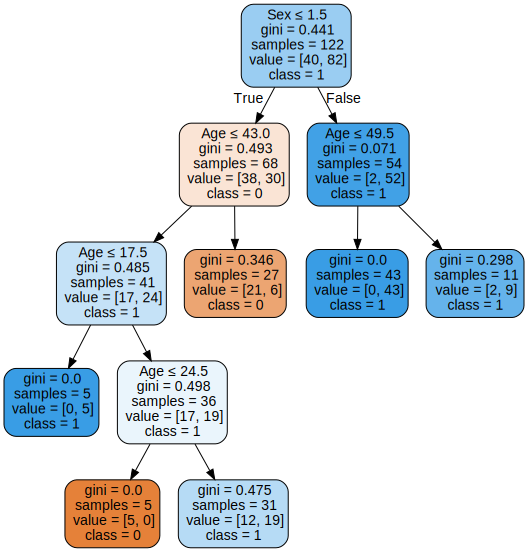

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:5],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('survived')
graph

valutazione finale: per trovare i deceduti con più accuratezza, usiamo il KNN (.74 di f1-score), per i soppravvissuti invece è più accurato usare dTree(.83)